In [ ]:
# =============================
# Data Science Mini Project
# Advanced Explorations Using Python
# =============================

# 1. Import Libraries & Set Options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set pandas display options
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)
sns.set_style("whitegrid")

In [ ]:
# 2. Read Data
df = pd.read_csv("insurance.csv")
print("Dataset Loaded Successfully!")
print("Shape of data:", df.shape)


Dataset Loaded Successfully!
Shape of data: (1338, 7)


In [ ]:
# 3. Understand & Prepare Data
print("\n--- First 5 Rows ---")
print(df.head())
print("\n--- Data Info ---")
print(df.info())
print("\n--- Summary Statistics ---")
print(df.describe(include="all"))


--- First 5 Rows ---
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

--- Summary Statistics ---
                age   

In [ ]:
#4.()) Understand the Variables (EDA Basics)
print("\n--- Unique values per column ---")
for col in df.columns:
    print(col, ":", df[col].nunique())


--- Unique values per column ---
age : 47
sex : 2
bmi : 548
children : 6
smoker : 2
region : 4
charges : 1337


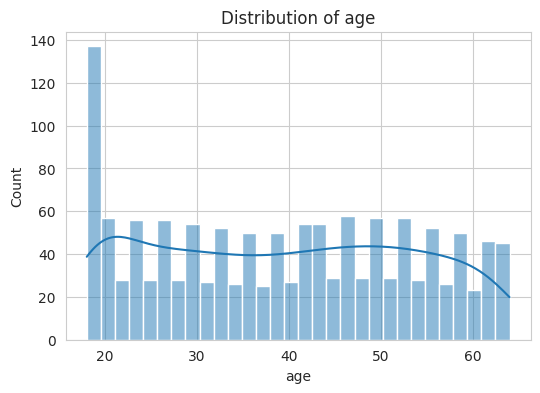

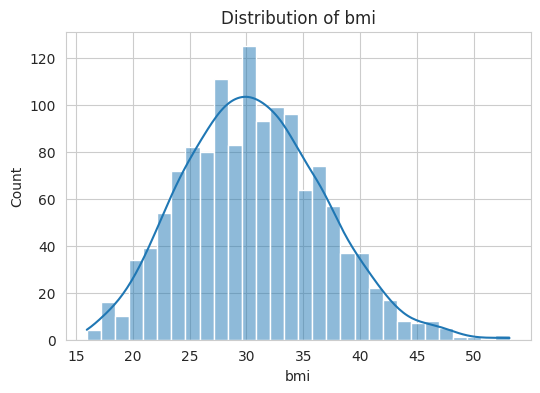

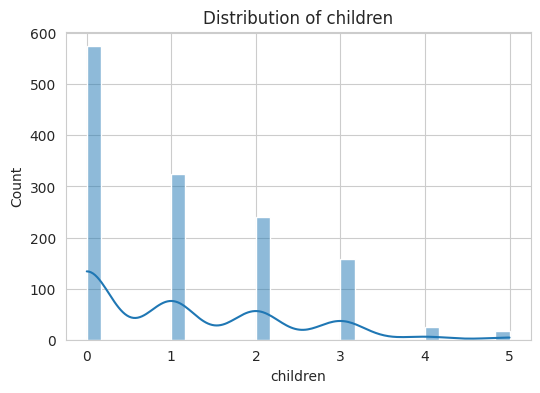

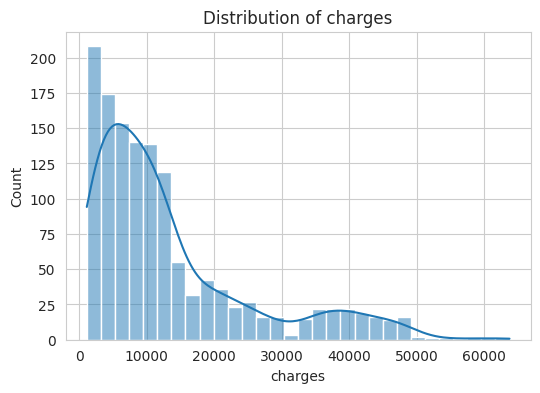

In [ ]:
# Distribution plots for numerical features
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

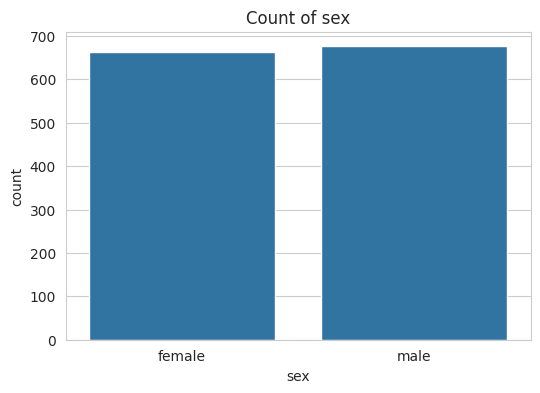

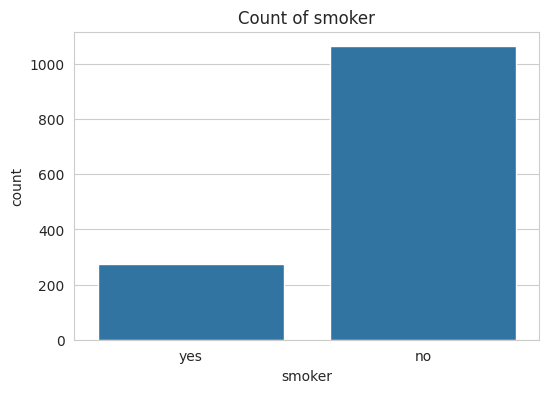

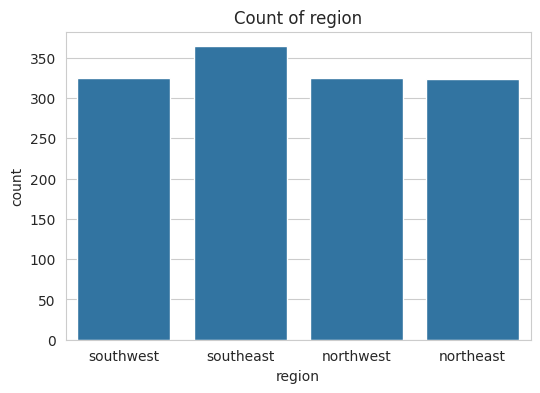

In [ ]:
# Count plots for categorical features
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Count of {col}")
    plt.show()

In [ ]:
# 5. Check for Missing Values
print("\n--- Missing Values ---")
print(df.isnull().sum())



--- Missing Values ---
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


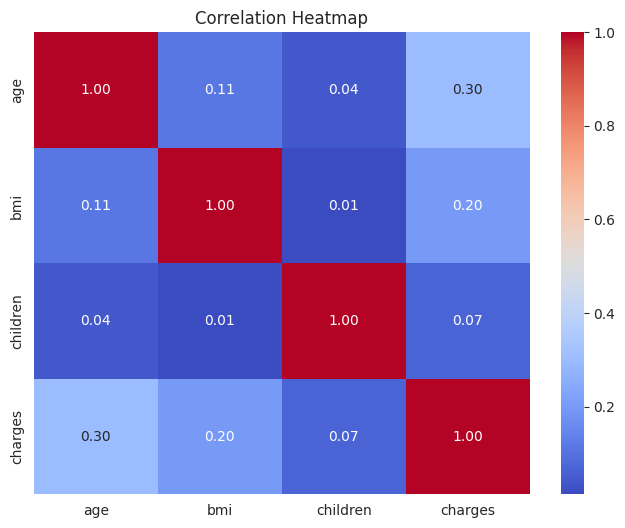

In [ ]:
# 6. Study Correlation (numeric only)
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=[np.number])  # keep only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

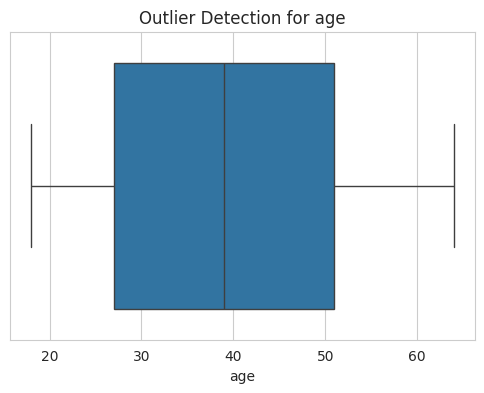

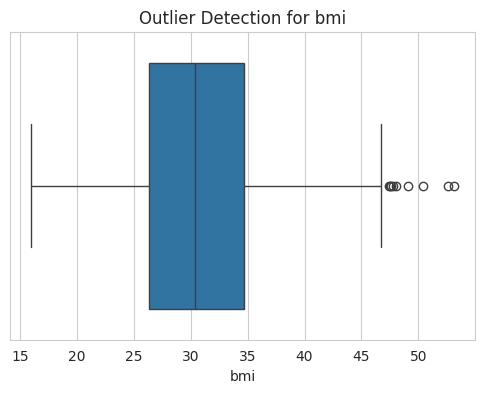

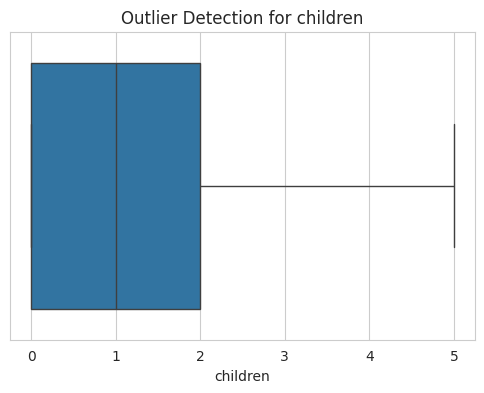

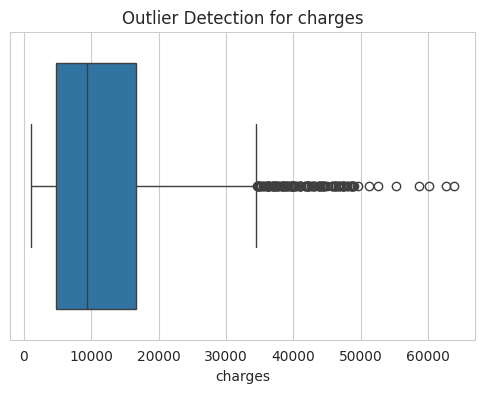

In [ ]:
# 7. Detect Outliers
# Using Boxplots
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection for {col}")
    plt.show()

In [ ]:
# Outlier detection using IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers

for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")

age: 0 outliers
bmi: 9 outliers
children: 0 outliers
charges: 139 outliers


In [ ]:
# 8. Feature Engineering – 'region' Variable
print("\n--- Feature Engineering on 'region' ---")
print(df['region'].value_counts())


--- Feature Engineering on 'region' ---
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [ ]:
# Convert region into dummy variables
df_encoded = pd.get_dummies(df, columns=['region'], drop_first=True)
print("After Encoding, new columns:", df_encoded.columns)


After Encoding, new columns: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [ ]:
# Example: Create a new feature "is_southeast"
df["is_southeast"] = np.where(df["region"] == "southeast", 1, 0)
print(df[["region", "is_southeast"]].head())

print("\nFinal Dataset Shape:", df.shape)

      region  is_southeast
0  southwest             0
1  southeast             1
2  southeast             1
3  northwest             0
4  northwest             0

Final Dataset Shape: (1338, 8)
